# K-Means Clustering

import library yang dibutuhkan

In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

import data yang akan digunakan

In [37]:
# Mengimpor dataset
dataset = pd.read_csv('data.csv')
dataset.head(5)

,Judul,Mahasiswa,Dosbing_1,Dosbing_2,Abstrak_indo,Abstract_english
0,Analisis Inovasi Dan Keunggulan Bersaing \r\nD...,Penulis : Sandy Ardiansyah,"Dosen Pembimbing I : Dr. Ir. Nurita Andriani, MM.","Dosen Pembimbing II :Suyono, S.E., M. S. M.",ABSTRAK\r\n\tTujuan penelitian ini adalah mend...,ABSTRACT\r\nThe purpose of this study is to de...
1,Pengaruh Bauran Pemasaran Terhadap Keputusan P...,Penulis : Mahrus Saleh,"Dosen Pembimbing I : Dr.H Pribanus Wantara, Dr...","Dosen Pembimbing II :Hadi Purnomo, SE., MM",Objek penelitian ini adalah pembelian produk X...,Object this research is consumer product of XL...
2,ANALISIS PORTOFOLIO YANG OPTIMAL DI BEI DENGAN...,Penulis : Mira Dwiastuti,"Dosen Pembimbing I : Hj Evaliati Amaniyah, S.E...","Dosen Pembimbing II :Echsan Gani, S.E, M.Si",Suatu keputusan investasi selalu berhubungan d...,An investment decision is always associated wi...
3,PENGARUH KOMPETENSI DOSEN TERHADAP KINERJA DOS...,Penulis : Aththaariq,"Dosen Pembimbing I : Dr.RM Moch Wispandono,.S....",Dosen Pembimbing II :Dr. Muhammad Alkirom Wild...,"Abstrak\r\n\r\nAththaariq, Pengaruh Kompetensi...",Abstract\r\n\r\nThis study is aimed to analyze...
4,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,Penulis : SATIYAH,Dosen Pembimbing I : Dra. Hj. S. Anugrahini Ir...,"Dosen Pembimbing II :Helmi Buyung Aulia,S,ST.S...",ABSTRAK\r\...,ABSTRACT...


maka dapat terlihat data yang akan kita proses

>import library untuk proses stopword

In [38]:
# import package
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from string import punctuation
sw_indo = stopwords.words('indonesian') + list(punctuation)

>Buang kolom yang tidak diperlukan, dikarenakan kita hanya akan memproses data Abstrak indo saja

In [39]:
dataset.drop(['Abstract_english','Mahasiswa', 'Dosbing_1', 'Dosbing_2'],axis=1,inplace=True)

>kita cek datanya

In [41]:
dataset.head(5)

,Judul,Abstrak_indo
0,Analisis Inovasi Dan Keunggulan Bersaing \r\nD...,ABSTRAK\r\n\tTujuan penelitian ini adalah mend...
1,Pengaruh Bauran Pemasaran Terhadap Keputusan P...,Objek penelitian ini adalah pembelian produk X...
2,ANALISIS PORTOFOLIO YANG OPTIMAL DI BEI DENGAN...,Suatu keputusan investasi selalu berhubungan d...
3,PENGARUH KOMPETENSI DOSEN TERHADAP KINERJA DOS...,"Abstrak\r\n\r\nAththaariq, Pengaruh Kompetensi..."
4,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,ABSTRAK\r\...


dapat dilihat bahwa kolom yang tidak diperlukan telah terhapus

>Lakukan proses tokenisasi dataset

In [43]:
bow = TfidfVectorizer(ngram_range=(1, 2), tokenizer=word_tokenize, stop_words=sw_indo, min_df=5)
bow_matrix = bow.fit_transform(dataset.Abstrak_indo)

c:\Users\nyamb\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


In [44]:
print(bow_matrix.shape)
type(bow_matrix)
df=pd.DataFrame(bow_matrix.toarray())
print(df)
idf=bow.idf_

(12, 45)
          0         1         2         3         4         5         6   \
0   0.157056  0.185914  0.134013  0.185914  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.127019  0.088106  0.264317  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.522852  0.261426   
3   0.097111  0.000000  0.165726  0.000000  0.000000  0.114955  0.114955   
4   0.104047  0.000000  0.177564  0.000000  0.615829  0.000000  0.000000   
5   0.081885  0.096931  0.069871  0.096931  0.000000  0.290794  0.096931   
6   0.144754  0.171352  0.123516  0.000000  0.171352  0.000000  0.000000   
7   0.000000  0.000000  0.087511  0.000000  0.000000  0.121403  0.121403   
8   0.071675  0.084845  0.000000  0.000000  0.000000  0.254535  0.084845   
9   0.079405  0.093996  0.135510  0.093996  0.187991  0.000000  0.000000   
10  0.000000  0.000000  0.069165  0.095952  0.383807  0.000000  0.000000   
11  0.052146  0.061728  0.044495  0.061728  0.308638  0.185183  0.061728   

  

>Kita tentukan clusternya, disini saya menentukan akan ada 4 cluster

In [45]:
kmeans = KMeans(n_clusters=4)

In [46]:
kmeans.fit(bow_matrix)

KMeans(n_clusters=4)

In [47]:
kmeans.cluster_centers_

array([[0.15705578, 0.18591421, 0.13401278, 0.18591421, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.68232322, 0.        , 0.        , 0.12402126, 0.13401278,
        0.        , 0.        , 0.13401278, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.1705808 , 0.34448988,
        0.        , 0.        , 0.        , 0.20361533, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.31411157, 0.20361533, 0.14495724,
        0.14495724, 0.        , 0.        , 0.        , 0.        ],
       [0.03839004, 0.04544407, 0.03934555, 0.02423282, 0.        ,
        0.29739605, 0.14115136, 0.04255879, 0.139375  , 0.14931258,
        0.0222342 , 0.        , 0.0917778 , 0.17825237, 0.10174632,
        0.05458357, 0.05978054, 0.10174632, 0.05008175, 0.05008175,
        0.11004796, 0.09360165, 0.11530877, 0.07792931, 0.32897365,
        0.02654005, 0.02654005, 0.13555834, 0. 

In [48]:
kmeans.labels_

array([0, 2, 1, 3, 3, 1, 3, 1, 1, 2, 2, 2])

In [50]:
import numpy as np

In [51]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [52]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 1, 1: 4, 2: 4, 3: 3}

In [53]:
import seaborn as sns

In [66]:
dataset["cluster"] = kmeans.labels_

In [67]:
kmeans.inertia_

0.013766230299483496

In [68]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=4, random_state=42)>

In [71]:
dataset

,Judul,Abstrak_indo,Cluster
0,Analisis Inovasi Dan Keunggulan Bersaing \r\nD...,ABSTRAK\r\n\tTujuan penelitian ini adalah mend...,2
1,Pengaruh Bauran Pemasaran Terhadap Keputusan P...,Objek penelitian ini adalah pembelian produk X...,0
2,ANALISIS PORTOFOLIO YANG OPTIMAL DI BEI DENGAN...,Suatu keputusan investasi selalu berhubungan d...,3
3,PENGARUH KOMPETENSI DOSEN TERHADAP KINERJA DOS...,"Abstrak\r\n\r\nAththaariq, Pengaruh Kompetensi...",0
4,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,ABSTRAK\r\...,0
5,analisis faktor-faktor yang berpengaruh terhad...,ABSTRAK\r\nTujuan penelitian ini adalah untuk ...,1
6,Pengaruh Kompensasi Terhadap Kinerja Karywan p...,ABSTRAK \r\n\r\n\tTujuan penelitian ini adalah...,2
7,PENGARUH STRUKTUR MODAL DAN LIKUIDITAS TERHADA...,Pendekatan penelitian yang digunakan dalam pen...,3
8,PENGARUH KUALITAS PELAYANAN TERHADAP KEPUASAN ...,ABSTRAK\r\n\r\nTujuan penelitian ini adalah un...,1
9,PENGARUH PERILAKU KONSUMEN TERHADAP KEPUTUSAN ...,ABSTRAK\r\nTujuan penelitian ini adalah untuk ...,2


Dapat dilihat bahwa tiap dokumen sudah mempunyai cluster masing masing

>Melakukan slicing dari dataset yang dimiliki, yaitu kolom ke 1 (Judul) dan 2 (Abstrak_indo) 

In [72]:
X = df.iloc[:, [1, 2]].values

>menampilkan plot dari skor wcss yang telah dihitung

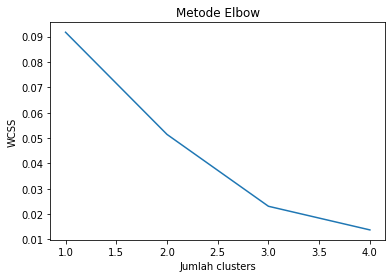

In [73]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

>Melakukan K-Means clustering terhadap objek kmeans, lalu kita lakukan prediksi seperti apa pengelompokan klusternya jika kita pilih K=4

In [74]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

>Lalu kita visualisasikan hasilnya

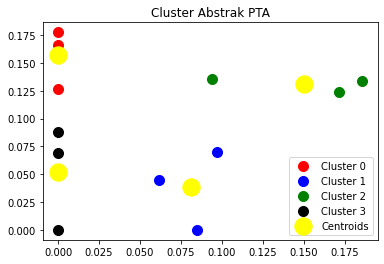

In [78]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster Abstrak PTA')
plt.legend()
plt.show()

Kita ingin menampilkan scatter plot, sehingga perintahnya adalah plt.scatter. Parameter untuk plt.scatter adalah sumbu x, kemudian diikuti sumbu y nya. 

Kemudian untuk sumbu x nya ditulis X[y_kmeans == 0, 0] artinya data poin nya berasal dari objek X. Penulisan y_kmeans == 0 adalah untuk mewakili baris X yang dipilih, yaitu baris yang clusternya masuk ke cluster 1 (urutan dimulai dari nol).

Untuk kolomnya mudah saja, karena ia adalah data Judul, maka kolom 1 objek X yang kita pilih, sehingga penulisannya setelah
y_kmeans == 0 adalah koma, kemudian diikuti nol.

Untuk sumbu y nya, ditulis X[y_kmeans == 0, 1] di mana bisa langsung dilihat bahwa kolom untuk Abstrak Indo adalah kolom ke 2, ditulis 1 di python.

Begitu seterusnya sampai kluster kelima.